In [1]:
%reload_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import pandas as pd
from tools import download, analyze, visualize, time, other
from astropy.table import Table
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import datetime

In [3]:
init_notebook_mode(connected=True)

## 1. Download Object Catalogues

#### Transient

In [4]:
transient_path = download.transient_cat(3000, overwrite=False)

File transient_cat.tbl already exists


In [5]:
transient_obj_df = Table.read(transient_path, format='ascii').to_pandas()

#### Permanent

In [6]:
permanent_path = download.permanent_cat(3000, overwrite=False)

File permanent_cat.tbl already exists


In [7]:
permanent_obj_df = Table.read(permanent_path, format='ascii').to_pandas()

## 2. Download Light Curves

In [ ]:
transient_lightcurves_paths = download.light_curves(
    transient_obj_df,
    transient=True,
    append_series=True
)
permanent_lightcurves_paths = download.light_curves(
    permanent_obj_df, 
    transient=False,
    append_series=True
)

## 3. Consolidate Light Curves

In [15]:
consolidated_transient_light_curves_path = time.time( 
    analyze.consolidate_light_curves,
    transient_obj_df,
    transient=True
)
transient_light_curves_df = pd.read_pickle(consolidated_transient_light_curves_path)

File consolidated.pickle already exists
0:00:00.000379


In [16]:
consolidated_permanent_light_curves_path = time.time( 
    analyze.consolidate_light_curves,
    permanent_obj_df,
    transient=False
)
permanent_light_curves_df = pd.read_pickle(consolidated_permanent_light_curves_path)

File consolidated.pickle already exists
0:00:00.000579


In [17]:
transient_light_curves_df.head()

,oid,ra,dec,clon,clat,obsmjd,mag_autocorr,goodflag
0,46572075001313,291.823749,45.201545,19h27m17.70s,45d12m05.56s,55376.219697,20.354,1
1,46572075001313,291.823749,45.201545,19h27m17.70s,45d12m05.56s,55376.263597,20.300,1
2,46572075001313,291.823749,45.201545,19h27m17.70s,45d12m05.56s,55755.272967,20.355,1
3,46572075001313,291.823749,45.201545,19h27m17.70s,45d12m05.56s,55755.311077,20.368,1
4,46572075001313,291.823749,45.201545,19h27m17.70s,45d12m05.56s,55755.479937,20.119,1


In [18]:
permanent_light_curves_df.head()

,oid,ra,dec,clon,clat,obsmjd,mag_autocorr,goodflag
0,39362070001535,74.797817,27.158644,04h59m11.48s,27d09m31.12s,55511.546767,20.013,1
1,39362070001606,74.802963,27.166820,04h59m12.71s,27d10m00.55s,55511.546767,20.011,1
2,39362070001582,74.798300,27.166972,04h59m11.59s,27d10m01.10s,55511.546767,16.828,1
3,39362070002065,74.796932,27.221247,04h59m11.26s,27d13m16.49s,55511.546767,20.122,1
4,39362070001528,74.737183,27.159092,04h58m56.92s,27d09m32.73s,55511.546767,18.611,1


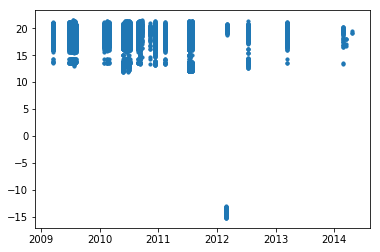

In [22]:
visualize.light_curve_scatter(transient_light_curves_df, marker_size=10)

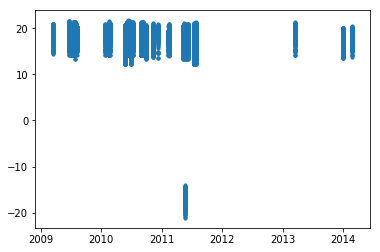

In [24]:
visualize.light_curve_scatter(permanent_light_curves_df, marker_size=10)

## 4. Generate Single Lightcurves for all objects

In [ ]:
visualize.generate_individual_light_curve_scatters(
    transient_obj_df,
    transient_light_curves_df, 
    is_transient=True,
    limit=50,
    random=True
)

visualize.generate_individual_light_curve_scatters(
    permanent_obj_df,
    permanent_light_curves_df, 
    is_transient=False, 
    limit=50,
    random=True
)

## 5. Count Light Curves Real Nobs

In [ ]:
analyze.lightcurve_real_nobs(transient_obj_df, transient_light_curves_df, append_series=True)
analyze.lightcurve_real_nobs(permanent_obj_df, permanent_light_curves_df, append_series=True)

In [36]:
transient_obj_df['real_nobs'].describe()

count    3000.000000
mean       17.904667
std        20.672382
min         0.000000
25%         2.000000
50%         7.000000
75%        26.000000
max        78.000000
Name: real_nobs, dtype: float64

In [37]:
permanent_obj_df['real_nobs'].describe()

count    3000.000000
mean        8.887333
std        15.581770
min         0.000000
25%         1.000000
50%         2.000000
75%        11.000000
max        78.000000
Name: real_nobs, dtype: float64

## 6. Explore single lightcurve

In [38]:
min_real_nobs = 25
transient_query = transient_obj_df['real_nobs'] >= min_real_nobs
permanent_query = permanent_obj_df['real_nobs'] >= min_real_nobs

In [42]:
transient_index = 0
permanent_index = 20
transient_oid = transient_obj_df[transient_query].iloc[transient_index]['oid']
permanent_oid = permanent_obj_df[permanent_query].iloc[permanent_index]['oid']

In [43]:
transient_light_curve_df = transient_light_curves_df[
    transient_light_curves_df['oid'] == transient_oid
]
permanent_light_curve_df = permanent_light_curves_df[
    permanent_light_curves_df['oid'] == permanent_oid
]

In [44]:
transient_light_curve_scatter = visualize.light_curve_interactive_scatter(
    transient_light_curve_df, 
    name= 'T-{}'.format(transient_light_curve_df.iloc[0]['oid'])
)

permanent_light_curve_scatter = visualize.light_curve_interactive_scatter(
    permanent_light_curve_df, 
    name='P-{}'.format(permanent_light_curve_df.iloc[0]['oid'])
)

iplot([transient_light_curve_scatter, permanent_light_curve_scatter])

## 7. Select Objects in Time Range

In [45]:
best_start_datetime = datetime.datetime(2010, 1, 1)
best_end_datetime = datetime.datetime(2012, 1, 1)

best_start_mjd = time.datetime_to_mjd(best_start_datetime)
best_end_mjd = time.datetime_to_mjd(best_end_datetime)

print(best_start_mjd, best_end_mjd)

55197.0 55927.0


In [46]:
best_transient_light_curves_query = (transient_light_curves_df['obsmjd'] >= best_start_mjd) & (transient_light_curves_df['obsmjd'] <= best_end_mjd)

best_permanent_light_curves_query = (permanent_light_curves_df['obsmjd'] >= best_start_mjd) & (permanent_light_curves_df['obsmjd'] <= best_end_mjd)

In [47]:
best_transient_light_curves_df = transient_light_curves_df[best_transient_light_curves_query]
best_permanent_light_curves_df = permanent_light_curves_df[best_permanent_light_curves_query]

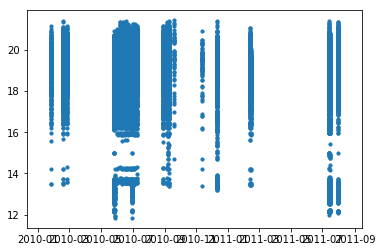

In [50]:
visualize.light_curve_scatter(best_transient_light_curves_df, marker_size=10)

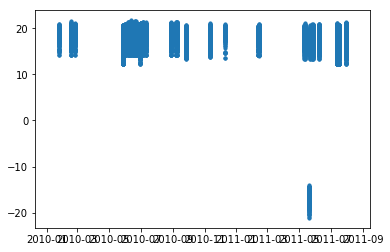

In [52]:
visualize.light_curve_scatter(best_permanent_light_curves_df, marker_size=10)

In [53]:
best_transient_obj_df = transient_obj_df[
    transient_obj_df['oid'].isin(best_transient_light_curves_df.oid.unique())
]
best_transient_obj_df.describe()

,ra,dec,oid,nobs,ngoodobs,real_nobs
count,2737.000000,2737.000000,2.737000e+03,2737.000000,2737.000000,2737.000000
mean,204.647847,36.191698,3.196002e+14,81.573621,59.172086,19.381805
std,112.818024,14.906806,4.328675e+14,66.413316,52.518376,21.041990
min,13.359022,17.702059,3.743206e+13,20.000000,15.000000,1.000000
25%,71.336779,18.879333,4.657207e+13,29.000000,22.000000,2.000000
50%,271.186638,44.959496,4.657207e+13,58.000000,39.000000,12.000000
75%,291.423057,45.478370,1.002042e+15,101.000000,77.000000,26.000000
max,292.079198,59.628588,1.002042e+15,255.000000,254.000000,78.000000
